In [94]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Daten laden

In [95]:
# Daten laden
data = pd.read_excel('DryBeanDataset/Dry_Bean_Dataset.xlsx')

In [96]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [97]:
# Vorhandene Klassen anschauen
data['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [98]:
# Daten zuweisen und skalieren
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
columns = data.iloc[:, :-1].columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DNN

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Attention
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt



In [141]:
# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode the labels
y_one_hot = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42)

### Modell aus der Literatur

In [142]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(7, activation='sigmoid'))
model.compile(optimizer="RMSprop", loss='categorical_crossentropy', metrics=['accuracy'])

In [143]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    batch_size=8,
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/50
 727/1361 [===============>..............] - ETA: 3s - loss: 1.6350 - accuracy: 0.3262

KeyboardInterrupt: 

### Selbst erstelltes Modell

In [144]:

# Datenaufteilung
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# One-Hot-Encoding der Labels
y_train_encoded = to_categorical(pd.factorize(y_train)[0])
y_test_encoded = to_categorical(pd.factorize(y_test)[0])




In [145]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden Layers (mindestens 10 Schichten)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3)) 

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Ausgangsschicht (Anzahl der Klassen = 7, softmax für Multiklassen-Klassifikation)
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

# Modell kompilieren
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [146]:
# Frühzeitiges Stoppen, um Overfitting zu vermeiden
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train_encoded, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
137/137 [==============================] - 1s 7ms/step - loss: 0.8393 - accuracy: 0.6854 - val_loss: 0.3199 - val_accuracy: 0.8958
Epoch 2/20
137/137 [==============================] - 1s 5ms/step - loss: 0.3490 - accuracy: 0.8952 - val_loss: 0.2395 - val_accuracy: 0.9174
Epoch 3/20
137/137 [==============================] - 1s 6ms/step - loss: 0.3035 - accuracy: 0.9102 - val_loss: 0.2286 - val_accuracy: 0.9270
Epoch 4/20
137/137 [==============================] - 1s 6ms/step - loss: 0.2771 - accuracy: 0.9149 - val_loss: 0.2418 - val_accuracy: 0.9206
Epoch 5/20
137/137 [==============================] - 1s 7ms/step - loss: 0.2680 - accuracy: 0.9153 - val_loss: 0.2459 - val_accuracy: 0.9219
Epoch 6/20
137/137 [==============================] - 1s 7ms/step - loss: 0.2518 - accuracy: 0.9178 - val_loss: 0.2479 - val_accuracy: 0.9215
Epoch 7/20
137/137 [==============================] - 1s 7ms/step - loss: 0.2585 - accuracy: 0.9191 - val_loss: 0.2444 - val_accuracy: 0.9224
Epoch 

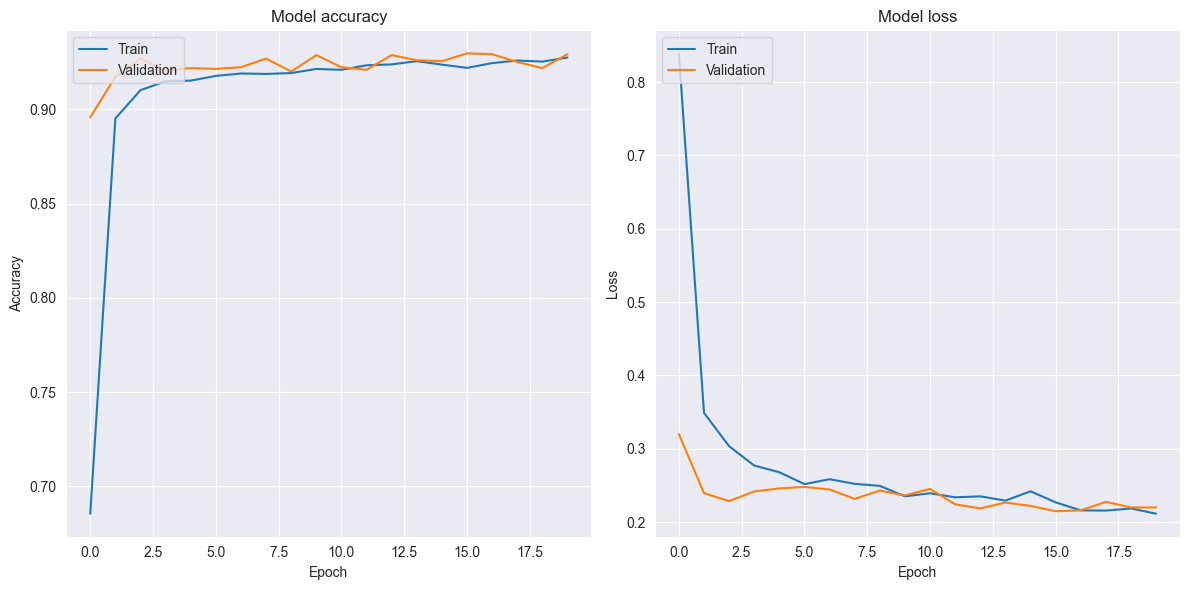

In [147]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Decision Trees

In [148]:
# Daten splitten (Falls dies nicht bereits oben gemacht wurde)
## Skalierte Daten: 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Unskalierte Daten:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [149]:
# Decision Tree instanziieren
clf = DecisionTreeClassifier()

# Trainieren des Entscheidungsbaums
clf = clf.fit(X_train, y_train)

# Vorhersage der Antwort auf den Testdaten
y_pred = clf.predict(X_test)

# Modellgenauigkeit
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.89386705839148


In [150]:
## plot speichern (aktuell sehr unübersichtlich)

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = columns,class_names=data['Class'].unique())
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.528764 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.528764 to fit



# Support vector machines

**Support Vector Machine (SVM)** ist ein Klassifikationsalgorithmus. Er findet die beste Hyperplane im n-dimensionalen Raum, die Datenpunkte verschiedener Klassen trennt. Diese Linie maximiert die Margin zwischen den nächsten Datenpunkten der verschiedenen Support Vectors (daher der Name). SVM kann verschiedene Kernel verwenden, um Daten in höhere Dimensionen zu transformieren, falls sie nicht linear trennbar sind. In diesem Beispiel wird ein linearer Kernel verwendet.


In [ ]:
# Imports
from sklearn import svm
from sklearn import metrics

In [ ]:
# Daten splitten (Falls dies nicht bereits oben gemacht wurde)
## Skalierte Daten: 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Unskalierte Daten:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Erstellen eines SVM-Klassifikators
clf = svm.SVC(kernel='poly', C=1.0, gamma=0.1)

# Training des Modells mit den Trainingsdaten
clf.fit(X_train, y_train)

# Vorhersage der Antworten für den Testdaten
y_pred = clf.predict(X_test)

# Modellgenauigkeit
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# K-Nearest

In [ ]:
# Notwendige Bibliotheken und Module importieren
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# Daten splitten (Falls dies nicht bereits oben gemacht wurde)
## Skalierte Daten: 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Unskalierte Daten:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# KNN Testing
## Initialisierung des KNeighborsClassifier mit 3 Nachbarn und Modellanpassung auf die Trainingsdaten
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

## Vorhersagen auf den Testdaten machen
y_pred = knn.predict(X_test)

## Genauigkeit des Modells berechnen und ausgeben
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# Initialisierung des Arrays damit die Scores entsprechend skaliert werden können.
k_values = [i for i in range(1, 31)]
scores = []

# Merkmale skalieren
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Schleife über verschiedene k-Werte
for k in k_values:
    # Initialisierung des KNeighborsClassifier mit dem aktuellen k-Wert
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Durchführung einer 5-fachen Kreuzvalidierung und Berechnung des durchschnittlichen Genauigkeitswerts
    # Kreuzvalidierung bedeutet, dass der Datensatz in 5 Teile aufgeteilt wird. 
    # Das Modell wird 5 Mal trainiert und getestet, wobei jedes Mal eine andere Teilmenge als Testset verwendet wird.
    # Der durchschnittliche Genauigkeitswert dieser 5 Durchläufe wird berechnet und gespeichert.
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))


In [ ]:
# Resultate Plotten
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")